In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.optimizers import Adam

In [3]:
from google.colab import files
uploaded = files.upload()

Saving drug_review_train.csv to drug_review_train.csv


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
dataset = pd.read_csv('drug_review_train.csv')
dataset.head()

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,"April 20, 2013",69,147
1,1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,"August 7, 2016",4,136
2,2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,"May 11, 2016",6,140
3,3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,"March 19, 2012",124,104
4,4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,"August 1, 2010",101,74


In [7]:
#check for unique values in each column
dataset.nunique(0)

Unnamed: 0        10000
patient_id       110811
drugName           2865
condition           791
review            84138
rating               10
date               3577
usefulCount         380
review_length       283
dtype: int64

In [8]:
#remove unwanted columns
cols_to_use = ['patient_id','drugName','condition','review','rating','usefulCount','review_length']
dataset = dataset[cols_to_use]
dataset.head()


,patient_id,drugName,condition,review,rating,usefulCount,review_length
0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,69,147
1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,4,136
2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,6,140
3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,124,104
4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,101,74


In [9]:
#it tells you how much rating is highest and lowest
dataset["rating"].value_counts()

rating
10.0    34255
9.0     19407
1.0     14286
8.0     13305
7.0      6671
5.0      5711
2.0      4776
3.0      4540
6.0      4359
4.0      3501
Name: count, dtype: int64

In [10]:
dataset.isnull().sum()
#to check whether there are any null values present or not

patient_id       0
drugName         0
condition        0
review           0
rating           0
usefulCount      0
review_length    0
dtype: int64

In [11]:
#we can create a new column telling the length of the review
dataset["length"] = dataset["review"].apply(len)
dataset.head()

,patient_id,drugName,condition,review,rating,usefulCount,review_length,length
0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,69,147,751
1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,4,136,759
2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,6,140,738
3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,124,104,534
4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,101,74,373


We may also check data types of the dataset entries

In [12]:
dataset.dtypes

patient_id         int64
drugName          object
condition         object
review            object
rating           float64
usefulCount        int64
review_length      int64
length             int64
dtype: object

*While checking for ratings we can divide it into 2 classes*


1.   Positive review with 7-8-9-10 rating
2.   Negative with 1-2-3-4-5-6 ratings

This is done to avoid data imbalancing






In [13]:
import matplotlib.pyplot as plt

A piechart helps us understand how the ratings are distributed

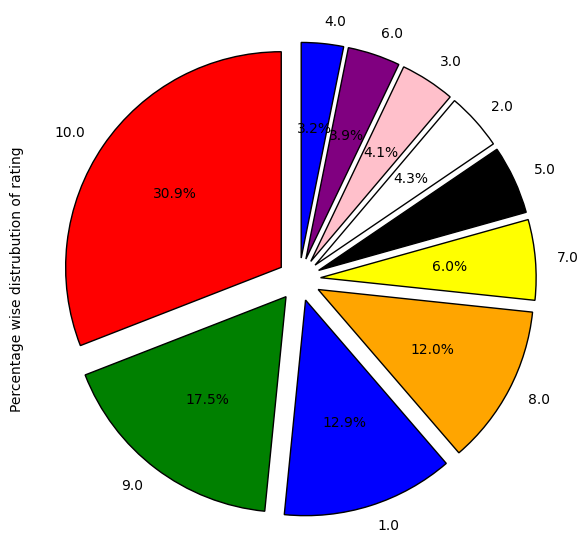

In [14]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow','black','white','pink','purple','blue')

wp = {'linewidth':1, "edgecolor":'black'}

tags = dataset['rating'].value_counts()/dataset.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=False, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [15]:
#converting ratings as positive or negative
dataset["feedback"] = dataset["rating"].apply(lambda x: 1 if x>6 else 0)
dataset.head()

,patient_id,drugName,condition,review,rating,usefulCount,review_length,length,feedback
0,89879,Cyclosporine,keratoconjunctivitis sicca,"""i have used restasis for about a year now and...",2.0,69,147,751,0
1,143975,Etonogestrel,birth control,"""my experience has been somewhat mixed. i have...",7.0,4,136,759,1
2,106473,Implanon,birth control,"""this is my second implanon would not recommen...",1.0,6,140,738,0
3,184526,Hydroxyzine,anxiety,"""i recommend taking as prescribed, and the bot...",10.0,124,104,534,1
4,91587,Dalfampridine,multiple sclerosis,"""i have been on ampyra for 5 days and have bee...",9.0,101,74,373,1


In [16]:
dataset["drugName"].value_counts()

drugName
Levonorgestrel                       2833
Etonogestrel                         2577
Ethinyl estradiol / norethindrone    2121
Nexplanon                            1672
Ethinyl estradiol / norgestimate     1549
                                     ... 
Riociguat                               1
Lamivudine / zidovudine                 1
Diprosone                               1
Nizoral Shampoo                         1
DermaZinc Shampoo                       1
Name: count, Length: 2865, dtype: int64

Analyse variation vs rating

In [17]:
dataset.groupby('drugName')['rating'].mean()


drugName
A + D Cracked Skin Relief               10.000000
A / B Otic                              10.000000
Abacavir / dolutegravir / lamivudine     7.575758
Abacavir / lamivudine / zidovudine       9.000000
Abatacept                                7.000000
                                          ...    
Zyvox                                    9.222222
ZzzQuil                                  4.000000
depo-subQ provera 104                    1.000000
ella                                     6.702703
femhrt                                   1.000000
Name: rating, Length: 2865, dtype: float64

In [18]:
dataset['length'].describe()

count    110811.000000
mean        505.882367
std         204.171483
min         130.000000
25%         334.000000
50%         503.000000
75%         703.000000
max       10433.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

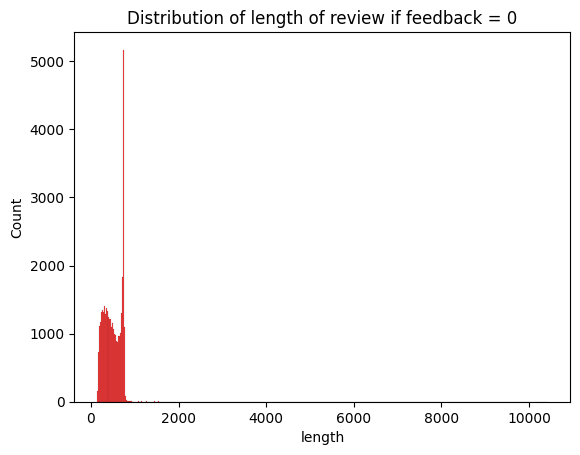

In [19]:
sns.histplot(dataset[dataset['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

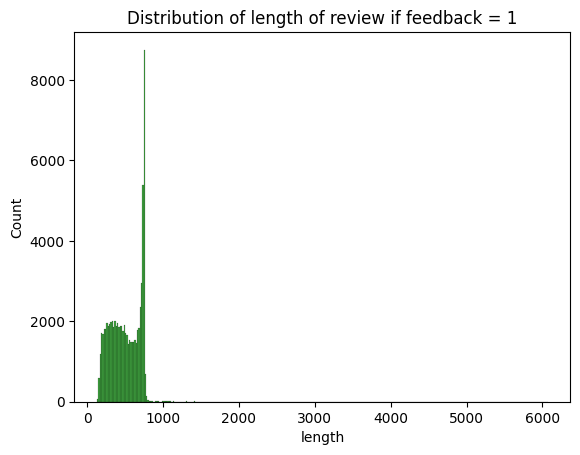

In [20]:
sns.histplot(dataset[dataset['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

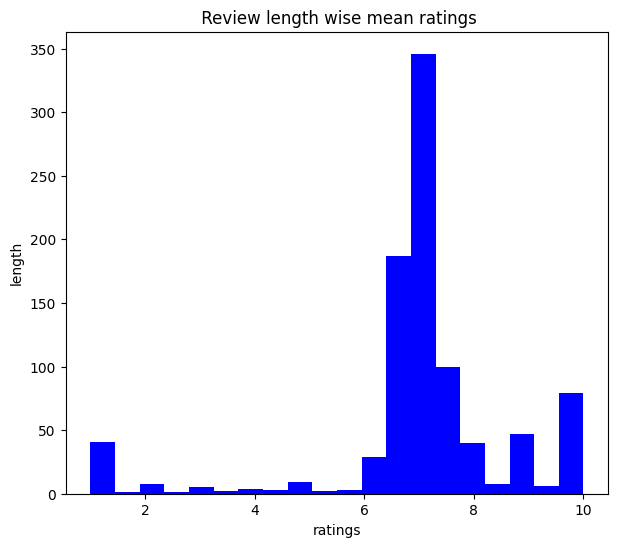

In [21]:
dataset.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

Graph above means for ratings between 6-8,number of feedbacks are higher

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
#from nltk.stem.poter import PorterStemmer
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


To build the corpus from the 'verified_reviews' we perform the following -

1) Replace any non alphabet characters with a space
2) Covert to lower case and split into words
3) Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [23]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, dataset.shape[0]):
  Ver_review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[i]['review'])
  Ver_review = Ver_review.lower().split()
  Ver_review = [stemmer.stem(word) for word in Ver_review if not word in STOPWORDS]
  Ver_review = ' '.join(Ver_review)
  corpus.append(Ver_review)

convert textual data to numerical representation by count vectorizer

In [24]:
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()
y = dataset['feedback'].values

save this count vectorizer data using pickle dump

In [25]:
print(X.shape)
print(y.shape)

(110811, 2000)
(110811,)


In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(88648, 2000)
(22163, 2000)
(88648,)
(22163,)


In [48]:
#we must scale the data between 0 and 1
print(X_train.max())
print(X_test.max())

27
13


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Solve via Random Forrest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model_rf = RandomForestClassifier(max_samples = 0.85, random_state = 40,n_estimators = 40)
model_rf.fit(X_train,Y_train)
y_pred = model_rf.predict(X_test)
print("Training Accuracy :", model_rf.score(X_train, Y_train))
print("Testing Accuracy :", model_rf.score(X_test, Y_test))

Training Accuracy : 0.9999323165779261
Testing Accuracy : 0.8598113973740017


Maximum test accuracy acheived is 85.98% ~ 86% even after tuning the hyperparameters

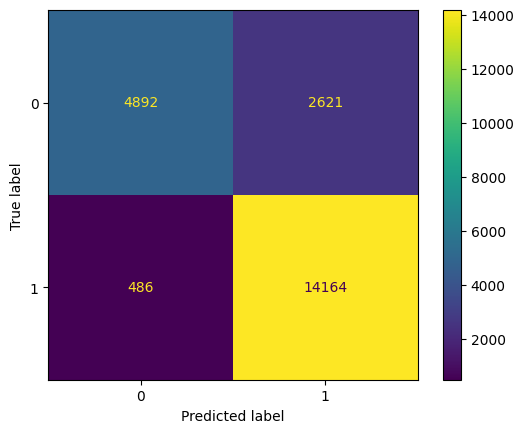

In [51]:
cm = confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

cross validation score

In [53]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model_rf, X = X_train, y = Y_train, cv = 5)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.8413613500519206
Standard Variance : 0.003008250164852227
